# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Goal Reached !
Goal Reached !


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

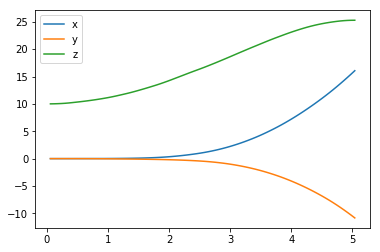

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

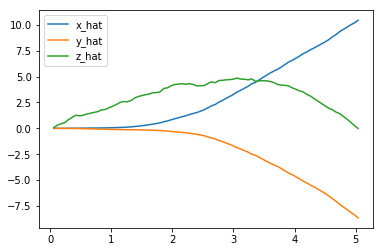

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

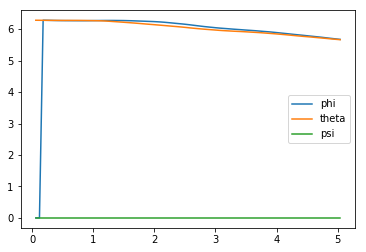

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

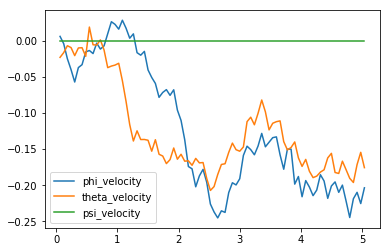

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

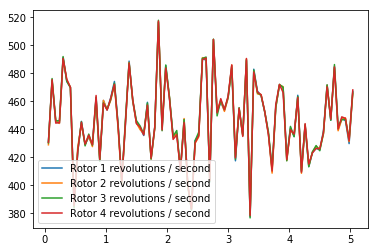

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 16.05760285 -10.83194545  25.27643364   5.67431759   5.66521653
   0.        ]
[10.43774163 -8.64627144 -0.01464541]
[-0.20363887 -0.17573246  0.        ]


In [9]:
task.reset()

array([ 0.,  0., 10.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,
        0., 10.,  0.,  0.,  0.])

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [10]:
task.target_pos

array([ 0.,  0., 10.])

In [11]:
task.sim.v

array([0., 0., 0.])

In [12]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Goal not Reached...
Episode =    1, score =   5.699 (best =   5.699), noise_scale = 0.05Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =    2, score =   1.240 (best =   5.699), noise_scale = 0.1Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =    3, score =   2.031 (best =   5.699), noise_scale = 0.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =    4, score =   1.066 (best =   5.699), noise_scale = 0.4Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =    5, score =   1.838 (best =   5.699), noise_scale = 0.8Goal not Reached...
Goal not Reached...
Episode =    6, score =   2.796 (best =   5.699), noise_scale = 1.6Goal not Reached...
Goal not Reached...
Episode =    7, score =   2.885 (best =   5.699), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =    8, score =   1.611 (best =   5.699), noise_scale = 3.2Goal not Reached...
Episode =    9, score =   5.798 (best =   5

Episode =   75, score =   0.759 (best =   6.264), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =   76, score =   1.707 (best =   6.264), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =   77, score =   1.727 (best =   6.264), noise_scale = 3.2Goal not Reached...
Episode =   78, score =   5.719 (best =   6.264), noise_scale = 3.2Goal not Reached...
Episode =   79, score =   4.363 (best =   6.264), noise_scale = 3.2Goal not Reached...
Episode =   80, score =   5.639 (best =   6.264), noise_scale = 3.2Goal not Reached...
Episode =   81, score =   5.163 (best =   6.264), noise_scale = 3.2Goal not Reached...
Episode =   82, score =   3.901 (best =   6.264), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =   83, score =   1.381 (best =   6.264), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =   84, score =   0.366 (best =   6.264), noise_scale = 3.2Goal not R

Episode =  150, score =   5.173 (best =   6.264), noise_scale = 3.2Goal not Reached...
Episode =  151, score =   5.293 (best =   6.264), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  152, score =   1.210 (best =   6.264), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  153, score =   2.668 (best =   6.264), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  154, score =   0.409 (best =   6.264), noise_scale = 3.2Goal not Reached...
Episode =  155, score =   6.042 (best =   6.264), noise_scale = 3.2Goal not Reached...
Episode =  156, score =   5.689 (best =   6.264), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  157, score =   1.092 (best =   6.264), noise_scale = 3.2Goal not Reached...
Episode =  158, score =   5.488 (best =   6.264), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  159, s

Episode =  225, score =   1.017 (best =   6.463), noise_scale = 3.2Goal not Reached...
Episode =  226, score =   5.031 (best =   6.463), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  227, score =   4.748 (best =   6.463), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  228, score =   1.036 (best =   6.463), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  229, score =   3.673 (best =   6.463), noise_scale = 3.2Goal not Reached...
Episode =  230, score =   4.681 (best =   6.463), noise_scale = 3.2Goal not Reached...
Episode =  231, score =   4.977 (best =   6.463), noise_scale = 3.2Goal not Reached...
Episode =  232, score =   5.237 (best =   6.463), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  233, score =   1.552 (best =   6.463), noise_scale = 3.2Goal not Reached...
Episode =  234, score =   6.030 (best =   6.463), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode = 

Episode =  301, score =   1.276 (best =   6.463), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  302, score =   0.206 (best =   6.463), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  303, score =   2.876 (best =   6.463), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  304, score =   1.290 (best =   6.463), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  305, score =   3.527 (best =   6.463), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  306, score =   4.323 (best =   6.463), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  307, score =   3.430 (best =   6.463), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  308, score =   2.615 (best =   6.463), noise_scale = 3.2Goal not Reached...
Episode =  309, score =   4.906 (best =   6.463), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  310, s

Episode =  377, score =   3.211 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  378, score =   0.770 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  379, score =  -0.295 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  380, score =   1.159 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  381, score =   5.937 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  382, score =   2.762 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  383, score =   4.863 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  384, score =   5.619 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  385, score =   5.027 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  386, score =   6.310 (best

Episode =  454, score =   6.150 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  455, score =   4.877 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  456, score =   4.092 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  457, score =   3.597 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  458, score =   2.586 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  459, score =   1.000 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  460, score =  -1.073 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  461, score =   3.023 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  462, score =  -0.007 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  463, s

Episode =  532, score =   2.827 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  533, score =   5.396 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  534, score =   4.358 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  535, score =   5.363 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  536, score =   2.185 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  537, score =   4.672 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  538, score =   1.741 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  539, score =   2.196 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  540, score =   1.206 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  541, score =   5.853 (best =   7.151), noise_scale = 3.2Goal not R

Episode =  608, score =   2.414 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  609, score =   1.352 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  610, score =   5.886 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  611, score =   2.977 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  612, score =   4.458 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  613, score =   4.501 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  614, score =   1.829 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  615, score =   4.765 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  616, score =   3.439 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  617, score =   3.698 (best =   7.151), noise_s

Episode =  685, score =   6.062 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  686, score =   0.991 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  687, score =   4.878 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  688, score =   5.833 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  689, score =   0.785 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  690, score =   0.400 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  691, score =   1.361 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  692, score =   1.531 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  693, score =  -0.561 (best =   7.

Episode =  761, score =  -0.048 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  762, score =   4.097 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  763, score =  -0.885 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  764, score =   5.331 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  765, score =   2.040 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  766, score =   2.437 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  767, score =   5.951 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  768, score =   4.444 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  769, score =   4.428 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  770, score =   4.259 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not R

Episode =  839, score =   2.319 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  840, score =  -0.059 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  841, score =   5.401 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  842, score =   1.991 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  843, score =   1.913 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  844, score =   5.151 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  845, score =   2.382 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  846, score =   6.401 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  847, score =   1.883 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  848, score =   5.186 (best

Episode =  917, score =   0.859 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  918, score =   0.602 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  919, score =  -0.633 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  920, score =   0.170 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  921, score =   5.653 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode =  922, score =   2.769 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  923, score =   2.361 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  924, score =   0.525 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  925, score =   0.926 (best =   7.

Episode =  991, score =   1.409 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  992, score =   4.913 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  993, score =   0.770 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  994, score =   0.329 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  995, score =   5.597 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode =  996, score =   0.629 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  997, score =   5.129 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  998, score =   6.237 (best =   7.151), noise_scale = 3.2Goal not Reached...
Episode =  999, score =   5.011 (best =   7.151), noise_scale = 3.2Goal not Reached...
Goal not Reached...
Episode = 1000, score =   3.401 (best =   7.151), noise_scale = 3.2

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [13]:
from agents.agent import DDPG

c:\program files\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [14]:
DDPG_agent = DDPG(task, task.state_size, task.action_size, task.action_high, task.action_low)

In [15]:
## TODO: Train your agent here.
DDPG_agent.train(n_episodes=2000) 

Goal not Reached...
Episode : 1/2000  Reward : 120.5673 Avg Reward :120.5673 time_steps : 28
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 2/2000  Reward : 18.8652 Avg Reward :69.7163 time_steps : 28
Goal not Reached...
Episode : 3/2000  Reward : 113.4039 Avg Reward :84.2788 time_steps : 34
Goal not Reached...
Goal not Reached...
Episode : 4/2000  Reward : 67.6661 Avg Reward :80.1256 time_steps : 22
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 5/2000  Reward : 21.3044 Avg Reward :68.3614 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 6/2000  Reward : 29.1595 Avg Reward :61.8277 time_steps : 23
Goal not Reached...
Goal not Reached...
Episode : 7/2000  Reward : 82.9138 Avg Reward :64.8400 time_steps : 24
Goal not Reached...
Episode : 8/2000  Reward : 193.8675 Avg Reward :80.9685 time_steps : 32
Goal not Reached...
Episode : 9/2000  Reward : 130.0772 Avg Reward :86.4250 time_steps : 25
Goal not Reached

Goal Reached !
Goal Reached !
Episode : 75/2000  Reward : 742.1693 Avg Reward :201.9590 time_steps : 84
Goal not Reached...
Episode : 76/2000  Reward : 85.5504 Avg Reward :200.4273 time_steps : 81
Goal not Reached...
Episode : 77/2000  Reward : 112.4896 Avg Reward :199.2852 time_steps : 29
Goal not Reached...
Episode : 78/2000  Reward : 122.9106 Avg Reward :198.3061 time_steps : 31
Goal not Reached...
Episode : 79/2000  Reward : 27.0838 Avg Reward :196.1387 time_steps : 45
Goal not Reached...
Episode : 80/2000  Reward : 85.1632 Avg Reward :194.7515 time_steps : 20
Goal not Reached...
Episode : 81/2000  Reward : 160.0094 Avg Reward :194.3226 time_steps : 29
Goal Reached !
Goal Reached !
Episode : 82/2000  Reward : 751.4944 Avg Reward :201.1174 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 83/2000  Reward : 730.6174 Avg Reward :207.4969 time_steps : 84
Goal not Reached...
Goal not Reached...
Episode : 84/2000  Reward : 73.7178 Avg Reward :205.9043 time_steps : 22
Goal not Reach

Goal not Reached...
Episode : 148/2000  Reward : 129.3539 Avg Reward :172.2422 time_steps : 22
Goal not Reached...
Goal not Reached...
Episode : 149/2000  Reward : 63.2434 Avg Reward :171.5107 time_steps : 29
Goal not Reached...
Episode : 150/2000  Reward : 121.3825 Avg Reward :171.1765 time_steps : 21
Goal Reached !
Goal Reached !
Episode : 151/2000  Reward : 707.3998 Avg Reward :174.7276 time_steps : 84
Goal not Reached...
Goal not Reached...
Episode : 152/2000  Reward : 113.8375 Avg Reward :174.3270 time_steps : 27
Goal not Reached...
Goal not Reached...
Episode : 153/2000  Reward : 98.2557 Avg Reward :173.8298 time_steps : 27
Goal not Reached...
Goal not Reached...
Episode : 154/2000  Reward : 73.6003 Avg Reward :173.1790 time_steps : 26
Goal not Reached...
Episode : 155/2000  Reward : 117.6053 Avg Reward :172.8204 time_steps : 29
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 156/2000  Reward : -31.7914 Avg Reward :171.5088 time_steps : 21
Goal not Reached..

Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 218/2000  Reward : 52.9297 Avg Reward :146.6444 time_steps : 28
Goal not Reached...
Goal not Reached...
Episode : 219/2000  Reward : 150.6068 Avg Reward :146.6625 time_steps : 29
Goal not Reached...
Goal not Reached...
Episode : 220/2000  Reward : 110.1391 Avg Reward :146.4965 time_steps : 25
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 221/2000  Reward : 89.2345 Avg Reward :146.2374 time_steps : 29
Goal not Reached...
Goal not Reached...
Episode : 222/2000  Reward : 141.3822 Avg Reward :146.2155 time_steps : 29
Goal not Reached...
Goal not Reached...
Episode : 223/2000  Reward : 132.1480 Avg Reward :146.1524 time_steps : 29
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 224/2000  Reward : 38.1296 Avg Reward :145.6702 time_steps : 24
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 225/2000  Reward : 81.0526 Avg Reward :145.3830 time_steps : 29
Goal

Goal Reached !
Goal Reached !
Episode : 292/2000  Reward : 873.0631 Avg Reward :232.8196 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 293/2000  Reward : 967.6334 Avg Reward :235.3275 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 294/2000  Reward : 793.1600 Avg Reward :237.2249 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 295/2000  Reward : 766.6207 Avg Reward :239.0195 time_steps : 84
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 296/2000  Reward : 31.4454 Avg Reward :238.3182 time_steps : 30
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 297/2000  Reward : 41.8161 Avg Reward :237.6566 time_steps : 30
Goal not Reached...
Episode : 298/2000  Reward : 142.3121 Avg Reward :237.3366 time_steps : 29
Goal not Reached...
Episode : 299/2000  Reward : 137.2324 Avg Reward :237.0018 time_steps : 29
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 300/2000  Reward : 30.1879 Avg Reward :236.3125 time

Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 364/2000  Reward : 46.2123 Avg Reward :208.5731 time_steps : 25
Goal not Reached...
Goal not Reached...
Episode : 365/2000  Reward : 70.8722 Avg Reward :208.1959 time_steps : 23
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 366/2000  Reward : 54.4154 Avg Reward :207.7757 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 367/2000  Reward : 86.1921 Avg Reward :207.4444 time_steps : 28
Goal not Reached...
Goal not Reached...
Episode : 368/2000  Reward : 94.3082 Avg Reward :207.1370 time_steps : 25
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 369/2000  Reward : 68.3457 Avg Reward :206.7609 time_steps : 27
Goal not Reached...
Goal not Reached...
Episode : 370/2000  Reward : 109.2386 Avg Reward :206.4973 time_steps : 25
Goal not Reached...
Episode : 371/2000  Reward : 160.4721 Avg Reward :206.3732 time_steps : 25
Goal not Reached...
Goal n

Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 437/2000  Reward : 59.7023 Avg Reward :221.0723 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 438/2000  Reward : 110.2680 Avg Reward :220.8193 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 439/2000  Reward : 58.4862 Avg Reward :220.4495 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 440/2000  Reward : 58.6554 Avg Reward :220.0818 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 441/2000  Reward : 108.1816 Avg Reward :219.8281 time_steps : 26
Goal not Reached...
Goal not Reached...
Episode : 442/2000  Reward : 113.4014 Avg Reward :219.5873 time_steps : 27
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 443/2000  Reward : 58.2132 Avg Reward :219.2230 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 444/2000  Reward : 58.7088 Avg Reward :218.8615 t

Goal Reached !
Goal Reached !
Episode : 508/2000  Reward : 744.5811 Avg Reward :223.3479 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 509/2000  Reward : 753.2870 Avg Reward :224.3891 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 510/2000  Reward : 771.5270 Avg Reward :225.4619 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 511/2000  Reward : 978.8256 Avg Reward :226.9362 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 512/2000  Reward : 909.8973 Avg Reward :228.2701 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 513/2000  Reward : 843.8205 Avg Reward :229.4700 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 514/2000  Reward : 776.5821 Avg Reward :230.5344 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 515/2000  Reward : 789.7740 Avg Reward :231.6203 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 516/2000  Reward : 795.9695 Avg Reward :232.7140 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 517/2000  Rewar

Goal not Reached...
Episode : 581/2000  Reward : 127.4802 Avg Reward :242.0301 time_steps : 30
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 582/2000  Reward : 72.6634 Avg Reward :241.7391 time_steps : 30
Goal not Reached...
Episode : 583/2000  Reward : 144.5136 Avg Reward :241.5724 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 584/2000  Reward : 14.6330 Avg Reward :241.1838 time_steps : 23
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 585/2000  Reward : 45.6250 Avg Reward :240.8495 time_steps : 26
Goal not Reached...
Episode : 586/2000  Reward : 138.8697 Avg Reward :240.6754 time_steps : 22
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 587/2000  Reward : 63.1472 Avg Reward :240.3730 time_steps : 25
Goal not Reached...
Episode : 588/2000  Reward : 187.4563 Avg Reward :240.2830 time_steps : 30
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 589/2000  Rewa

Goal not Reached...
Goal not Reached...
Episode : 653/2000  Reward : 139.5851 Avg Reward :250.2453 time_steps : 28
Goal not Reached...
Goal not Reached...
Episode : 654/2000  Reward : 107.4875 Avg Reward :250.0270 time_steps : 31
Goal not Reached...
Goal not Reached...
Episode : 655/2000  Reward : 107.7624 Avg Reward :249.8098 time_steps : 25
Goal not Reached...
Goal not Reached...
Episode : 656/2000  Reward : 74.4422 Avg Reward :249.5425 time_steps : 25
Goal not Reached...
Goal not Reached...
Episode : 657/2000  Reward : 113.1412 Avg Reward :249.3348 time_steps : 28
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 658/2000  Reward : 31.4685 Avg Reward :249.0037 time_steps : 25
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 659/2000  Reward : 42.6522 Avg Reward :248.6906 time_steps : 24
Goal not Reached...
Goal not Reached...
Episode : 660/2000  Reward : 85.4618 Avg Reward :248.4433 time_steps : 24
Goal not Reached...
Goal not Reached...
Epis

Goal not Reached...
Goal not Reached...
Episode : 726/2000  Reward : 125.6065 Avg Reward :240.6786 time_steps : 46
Goal not Reached...
Episode : 727/2000  Reward : 238.8263 Avg Reward :240.6761 time_steps : 36
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 728/2000  Reward : 93.2123 Avg Reward :240.4735 time_steps : 35
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 729/2000  Reward : 62.4745 Avg Reward :240.2293 time_steps : 27
Goal not Reached...
Episode : 730/2000  Reward : 155.4482 Avg Reward :240.1132 time_steps : 25
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 731/2000  Reward : 50.7356 Avg Reward :239.8541 time_steps : 25
Goal not Reached...
Episode : 732/2000  Reward : 146.3385 Avg Reward :239.7264 time_steps : 24
Goal not Reached...
Goal not Reached...
Episode : 733/2000  Reward : 94.7888 Avg Reward :239.5286 time_steps : 24
Goal not Reached...
Goal not Reached...
Episode : 734/2000  Reward : 99.5548 Avg Rew

Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 800/2000  Reward : 61.3083 Avg Reward :229.1958 time_steps : 73
Goal not Reached...
Episode : 801/2000  Reward : 150.3661 Avg Reward :229.0974 time_steps : 46
Goal not Reached...
Goal not Reached...
Episode : 802/2000  Reward : 234.1492 Avg Reward :229.1037 time_steps : 48
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 803/2000  Reward : 84.8048 Avg Reward :228.9240 time_steps : 52
Goal not Reached...
Episode : 804/2000  Reward : 158.8745 Avg Reward :228.8369 time_steps : 32
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 805/2000  Reward : -26.6423 Avg Reward :228.5195 time_steps : 58
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 806/2000  Reward : 8.4559 Avg Reward :228.2465 time_steps : 21
Goal not Reached...
Goal not Reached...
Episode : 807/2000  Reward : 38.4712 Avg Reward :228.0113 time_steps : 17
Goal not Reached...
Goal not Reached...
Episo

Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 871/2000  Reward : 29.6124 Avg Reward :217.3764 time_steps : 24
Goal not Reached...
Episode : 872/2000  Reward : 139.3958 Avg Reward :217.2870 time_steps : 29
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 873/2000  Reward : 25.9590 Avg Reward :217.0678 time_steps : 30
Goal not Reached...
Goal not Reached...
Episode : 874/2000  Reward : 85.8655 Avg Reward :216.9177 time_steps : 29
Goal not Reached...
Episode : 875/2000  Reward : 142.5901 Avg Reward :216.8328 time_steps : 29
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 876/2000  Reward : 10.6541 Avg Reward :216.5974 time_steps : 30
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 877/2000  Reward : 34.9571 Avg Reward :216.3903 time_steps : 30
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 878/2000  Reward : 40.6767 Avg Reward :216.1901 time_steps : 32
Goal not Reached...
Goal n

Goal not Reached...
Episode : 943/2000  Reward : 136.4664 Avg Reward :207.5860 time_steps : 29
Goal not Reached...
Episode : 944/2000  Reward : 140.2411 Avg Reward :207.5147 time_steps : 29
Goal not Reached...
Episode : 945/2000  Reward : 127.2565 Avg Reward :207.4297 time_steps : 29
Goal not Reached...
Episode : 946/2000  Reward : 144.8835 Avg Reward :207.3636 time_steps : 29
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 947/2000  Reward : 38.7814 Avg Reward :207.1856 time_steps : 29
Goal not Reached...
Episode : 948/2000  Reward : 138.5208 Avg Reward :207.1132 time_steps : 29
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 949/2000  Reward : 46.3751 Avg Reward :206.9438 time_steps : 30
Goal not Reached...
Episode : 950/2000  Reward : 141.8243 Avg Reward :206.8753 time_steps : 29
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 951/2000  Reward : 33.8943 Avg Reward :206.6934 time_steps : 30
Goal not Reached...
Episode 

Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1019/2000  Reward : 42.4334 Avg Reward :199.8113 time_steps : 30
Goal not Reached...
Episode : 1020/2000  Reward : 137.8505 Avg Reward :199.7505 time_steps : 31
Goal not Reached...
Episode : 1021/2000  Reward : 136.0332 Avg Reward :199.6881 time_steps : 29
Goal not Reached...
Episode : 1022/2000  Reward : 137.8681 Avg Reward :199.6276 time_steps : 29
Goal not Reached...
Episode : 1023/2000  Reward : 123.2765 Avg Reward :199.5530 time_steps : 31
Goal not Reached...
Goal not Reached...
Episode : 1024/2000  Reward : 89.1617 Avg Reward :199.4452 time_steps : 29
Goal not Reached...
Episode : 1025/2000  Reward : 144.1622 Avg Reward :199.3912 time_steps : 30
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1026/2000  Reward : 61.7789 Avg Reward :199.2571 time_steps : 30
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1027/2000  Reward : 44.2205 Avg Reward :199.1062 time_steps : 31


Goal not Reached...
Goal not Reached...
Episode : 1091/2000  Reward : 67.4524 Avg Reward :194.5109 time_steps : 28
Goal not Reached...
Episode : 1092/2000  Reward : 161.3913 Avg Reward :194.4806 time_steps : 29
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1093/2000  Reward : 19.1439 Avg Reward :194.3202 time_steps : 29
Goal not Reached...
Episode : 1094/2000  Reward : 121.4349 Avg Reward :194.2536 time_steps : 28
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1095/2000  Reward : 19.7259 Avg Reward :194.0942 time_steps : 28
Goal not Reached...
Goal not Reached...
Episode : 1096/2000  Reward : 101.1656 Avg Reward :194.0094 time_steps : 33
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1097/2000  Reward : 70.5336 Avg Reward :193.8968 time_steps : 31
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1098/2000  Reward : 66.7347 Avg Reward :193.7810 time_steps : 31
Goal not Reached...
Goal not Reached.

Goal not Reached...
Episode : 1162/2000  Reward : 199.7228 Avg Reward :192.6373 time_steps : 32
Goal not Reached...
Episode : 1163/2000  Reward : 192.3081 Avg Reward :192.6370 time_steps : 28
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1164/2000  Reward : 244.1707 Avg Reward :192.6813 time_steps : 58
Goal not Reached...
Goal not Reached...
Episode : 1165/2000  Reward : 354.8135 Avg Reward :192.8205 time_steps : 62
Goal not Reached...
Episode : 1166/2000  Reward : 212.3542 Avg Reward :192.8372 time_steps : 31
Goal not Reached...
Episode : 1167/2000  Reward : 283.0382 Avg Reward :192.9145 time_steps : 41
Goal not Reached...
Episode : 1168/2000  Reward : 192.2016 Avg Reward :192.9139 time_steps : 28
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1169/2000  Reward : 68.3706 Avg Reward :192.8074 time_steps : 29
Goal not Reached...
Goal not Reached...
Episode : 1170/2000  Reward : 131.8684 Avg Reward :192.7553 time_steps : 33
Goal not Reached.

Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1235/2000  Reward : 93.1538 Avg Reward :192.2302 time_steps : 32
Goal Reached !
Goal Reached !
Episode : 1236/2000  Reward : 923.1602 Avg Reward :192.8216 time_steps : 84
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1237/2000  Reward : 130.0178 Avg Reward :192.7708 time_steps : 34
Goal not Reached...
Episode : 1238/2000  Reward : 309.1093 Avg Reward :192.8648 time_steps : 43
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1239/2000  Reward : 109.5657 Avg Reward :192.7976 time_steps : 32
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1240/2000  Reward : 80.0984 Avg Reward :192.7067 time_steps : 30
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1241/2000  Reward : 54.5287 Avg Reward :192.5953 time_steps : 27
Goal not Reached...
Goal not Reached...
Episode : 1242/2000  Reward : 352.3410 Avg Reward :192.7240 time_steps : 84
Goal 

Goal not Reached...
Goal not Reached...
Episode : 1305/2000  Reward : 94.0369 Avg Reward :190.4882 time_steps : 32
Goal not Reached...
Goal not Reached...
Episode : 1306/2000  Reward : 113.7161 Avg Reward :190.4294 time_steps : 27
Goal not Reached...
Episode : 1307/2000  Reward : 166.0728 Avg Reward :190.4108 time_steps : 26
Goal not Reached...
Episode : 1308/2000  Reward : 159.8409 Avg Reward :190.3874 time_steps : 26
Goal not Reached...
Episode : 1309/2000  Reward : 161.2682 Avg Reward :190.3652 time_steps : 26
Goal not Reached...
Episode : 1310/2000  Reward : 149.5285 Avg Reward :190.3340 time_steps : 25
Goal not Reached...
Goal not Reached...
Episode : 1311/2000  Reward : 110.8908 Avg Reward :190.2734 time_steps : 27
Goal not Reached...
Episode : 1312/2000  Reward : 170.2144 Avg Reward :190.2581 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1313/2000  Reward : 76.9515 Avg Reward :190.1718 time_steps : 27
Goal not Reached...
Goal not Reached..

Goal not Reached...
Goal not Reached...
Episode : 1376/2000  Reward : 114.5920 Avg Reward :186.4967 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1377/2000  Reward : 125.9179 Avg Reward :186.4527 time_steps : 32
Goal not Reached...
Episode : 1378/2000  Reward : 190.5140 Avg Reward :186.4557 time_steps : 31
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1379/2000  Reward : 64.3343 Avg Reward :186.3671 time_steps : 28
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1380/2000  Reward : 93.0146 Avg Reward :186.2995 time_steps : 30
Goal not Reached...
Goal not Reached...
Episode : 1381/2000  Reward : 78.3787 Avg Reward :186.2213 time_steps : 21
Goal not Reached...
Episode : 1382/2000  Reward : 158.9692 Avg Reward :186.2016 time_steps : 26
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1383/2000  Reward : 72.6251 Avg Reward :186.1195 time_steps : 27
Goal not Reached...
Goal not Reached

Goal not Reached...
Episode : 1445/2000  Reward : 141.2483 Avg Reward :182.3559 time_steps : 27
Goal not Reached...
Episode : 1446/2000  Reward : 163.7616 Avg Reward :182.3430 time_steps : 27
Goal not Reached...
Episode : 1447/2000  Reward : 173.5747 Avg Reward :182.3370 time_steps : 27
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1448/2000  Reward : 26.9433 Avg Reward :182.2296 time_steps : 28
Goal not Reached...
Episode : 1449/2000  Reward : 101.5172 Avg Reward :182.1739 time_steps : 27
Goal not Reached...
Goal not Reached...
Episode : 1450/2000  Reward : 49.3668 Avg Reward :182.0823 time_steps : 27
Goal not Reached...
Goal not Reached...
Episode : 1451/2000  Reward : 65.3767 Avg Reward :182.0019 time_steps : 28
Goal not Reached...
Goal not Reached...
Episode : 1452/2000  Reward : 109.4106 Avg Reward :181.9519 time_steps : 26
Goal not Reached...
Episode : 1453/2000  Reward : 157.8140 Avg Reward :181.9353 time_steps : 26
Goal not Reached...
Episode : 1454/2000

Goal not Reached...
Goal not Reached...
Episode : 1515/2000  Reward : 114.7612 Avg Reward :178.2835 time_steps : 27
Goal not Reached...
Episode : 1516/2000  Reward : 150.3521 Avg Reward :178.2650 time_steps : 25
Goal not Reached...
Episode : 1517/2000  Reward : 135.0505 Avg Reward :178.2365 time_steps : 23
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1518/2000  Reward : 64.0942 Avg Reward :178.1614 time_steps : 29
Goal not Reached...
Goal not Reached...
Episode : 1519/2000  Reward : 112.6083 Avg Reward :178.1182 time_steps : 28
Goal not Reached...
Episode : 1520/2000  Reward : 150.7765 Avg Reward :178.1002 time_steps : 24
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1521/2000  Reward : 56.1034 Avg Reward :178.0200 time_steps : 25
Goal not Reached...
Episode : 1522/2000  Reward : 159.0853 Avg Reward :178.0076 time_steps : 25
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1523/2000  Reward : 37.4833 Avg Reward :177.

Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1587/2000  Reward : 77.9227 Avg Reward :174.9542 time_steps : 31
Goal not Reached...
Goal not Reached...
Episode : 1588/2000  Reward : 106.6171 Avg Reward :174.9112 time_steps : 33
Goal not Reached...
Episode : 1589/2000  Reward : 168.2889 Avg Reward :174.9070 time_steps : 35
Goal not Reached...
Episode : 1590/2000  Reward : 172.6640 Avg Reward :174.9056 time_steps : 29
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1591/2000  Reward : 66.4103 Avg Reward :174.8374 time_steps : 27
Goal not Reached...
Episode : 1592/2000  Reward : 171.1384 Avg Reward :174.8351 time_steps : 29
Goal not Reached...
Episode : 1593/2000  Reward : 200.1231 Avg Reward :174.8510 time_steps : 32
Goal not Reached...
Goal not Reached...
Episode : 1594/2000  Reward : 115.8327 Avg Reward :174.8139 time_steps : 38
Goal not Reached...
Episode : 1595/2000  Reward : 162.7181 Avg Reward :174.8064 time_steps : 34
Goal not Reached..

Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1659/2000  Reward : 111.4212 Avg Reward :172.1017 time_steps : 38
Goal not Reached...
Goal not Reached...
Episode : 1660/2000  Reward : 129.4358 Avg Reward :172.0760 time_steps : 27
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1661/2000  Reward : -13.7882 Avg Reward :171.9641 time_steps : 19
Goal not Reached...
Episode : 1662/2000  Reward : 158.4392 Avg Reward :171.9560 time_steps : 26
Goal not Reached...
Episode : 1663/2000  Reward : 114.8105 Avg Reward :171.9216 time_steps : 22
Goal not Reached...
Episode : 1664/2000  Reward : 152.7456 Avg Reward :171.9101 time_steps : 25
Goal not Reached...
Episode : 1665/2000  Reward : 102.0785 Avg Reward :171.8681 time_steps : 21
Goal not Reached...
Episode : 1666/2000  Reward : 129.2185 Avg Reward :171.8425 time_steps : 22
Goal not Reached...
Goal not Reached...
Episode : 1667/2000  Reward : 52.2258 Avg Reward :171.7708 time_steps : 23
Goal not Reached.

Goal Reached !
Goal Reached !
Episode : 1731/2000  Reward : 774.2514 Avg Reward :170.7034 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 1732/2000  Reward : 751.6310 Avg Reward :171.0388 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 1733/2000  Reward : 751.3197 Avg Reward :171.3736 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 1734/2000  Reward : 683.3524 Avg Reward :171.6689 time_steps : 84
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1735/2000  Reward : 173.3333 Avg Reward :171.6698 time_steps : 72
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1736/2000  Reward : 111.7339 Avg Reward :171.6353 time_steps : 72
Goal not Reached...
Episode : 1737/2000  Reward : 257.6665 Avg Reward :171.6848 time_steps : 68
Goal not Reached...
Goal not Reached...
Episode : 1738/2000  Reward : 237.4683 Avg Reward :171.7227 time_steps : 57
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1739/2000  Reward : 17

Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1803/2000  Reward : 167.3106 Avg Reward :171.3325 time_steps : 64
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1804/2000  Reward : 199.4025 Avg Reward :171.3481 time_steps : 60
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 1805/2000  Reward : 67.3094 Avg Reward :171.2904 time_steps : 33
Goal not Reached...
Episode : 1806/2000  Reward : 233.1513 Avg Reward :171.3247 time_steps : 41
Goal not Reached...
Episode : 1807/2000  Reward : 256.0052 Avg Reward :171.3715 time_steps : 45
Goal not Reached...
Episode : 1808/2000  Reward : 260.2347 Avg Reward :171.4207 time_steps : 49
Goal not Reached...
Goal not Reached...
Episode : 1809/2000  Reward : 192.0012 Avg Reward :171.4321 time_steps : 49
Goal not Reached...
Goal not Reached...
Episode : 1810/2000  Reward : 235.7182 Avg Reward :171.4676 time_steps : 58
Goal not Reached...
Goal not Reached...
Goal not Reached...
Episode : 181

Goal not Reached...
Goal not Reached...
Episode : 1874/2000  Reward : 173.8633 Avg Reward :171.8498 time_steps : 38
Goal not Reached...
Goal not Reached...
Episode : 1875/2000  Reward : 109.1599 Avg Reward :171.8163 time_steps : 28
Goal not Reached...
Episode : 1876/2000  Reward : 181.5818 Avg Reward :171.8216 time_steps : 29
Goal not Reached...
Episode : 1877/2000  Reward : 105.3724 Avg Reward :171.7862 time_steps : 21
Goal not Reached...
Goal not Reached...
Episode : 1878/2000  Reward : 100.1448 Avg Reward :171.7480 time_steps : 26
Goal not Reached...
Episode : 1879/2000  Reward : 150.4432 Avg Reward :171.7367 time_steps : 26
Goal not Reached...
Episode : 1880/2000  Reward : 133.6036 Avg Reward :171.7164 time_steps : 23
Goal not Reached...
Goal not Reached...
Episode : 1881/2000  Reward : 114.2980 Avg Reward :171.6859 time_steps : 30
Goal not Reached...
Goal not Reached...
Episode : 1882/2000  Reward : 76.6242 Avg Reward :171.6353 time_steps : 61
Goal not Reached...
Episode : 1883/20

Goal Reached !
Goal Reached !
Episode : 1949/2000  Reward : 778.4271 Avg Reward :180.6024 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 1950/2000  Reward : 796.5301 Avg Reward :180.9183 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 1951/2000  Reward : 757.7954 Avg Reward :181.2140 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 1952/2000  Reward : 738.4361 Avg Reward :181.4994 time_steps : 84
Goal not Reached...
Episode : 1953/2000  Reward : 182.4739 Avg Reward :181.4999 time_steps : 30
Goal not Reached...
Goal not Reached...
Episode : 1954/2000  Reward : 91.7710 Avg Reward :181.4540 time_steps : 23
Goal Reached !
Goal Reached !
Episode : 1955/2000  Reward : 939.7428 Avg Reward :181.8419 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 1956/2000  Reward : 899.1645 Avg Reward :182.2086 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 1957/2000  Reward : 769.9446 Avg Reward :182.5089 time_steps : 84
Goal Reached !
Goal Reached !
Episode : 1958/20

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [16]:
## TODO: Plot the rewards
episodes, all_rewards, all_avg_rewards, cordinates, velocity,angular = zip(*DDPG_agent.training_results)

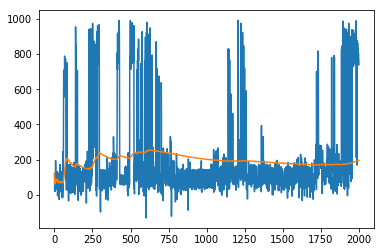

In [17]:
plt.plot(episodes, all_rewards, label='episode/rewards')
plt.plot(episodes, all_avg_rewards, label='episode/avg_rewards')
plt.show()

In [18]:
cordinates = np.array(cordinates)

In [19]:
cordinates.shape

(2000, 6)

(-95.5366301051937, 147.56655896731243)

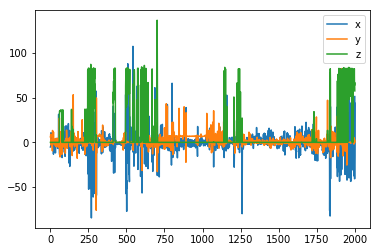

In [20]:
Xs,Ys,Zs = cordinates[:,0], cordinates[:,1], cordinates[:,2]
plt.plot(episodes, Xs, label='x')
plt.plot(episodes, Ys, label='y')
plt.plot(episodes, Zs, label='z')
plt.legend()
plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

<p>This is the reward function that i designed for this task; <b> np.tanh(1 -.3*(abs(self.sim.pose[:3]-self.target_pos[:3]))).sum() + 1.25</b>.
    <p> At the end of episode, if the agent reaches the goal a +150 bonus reward will be given to the agent, but if the agent is unable to reach the goal, -50 reward penality will be received by the agent. For more explanation, i will divide how the rewards function works into 3 parts.</p>
    </p>
<ol>
    <li>
        np.tanh(1 -.3*(abs(self.sim.pose[:3]-self.target_pos[:3]))). This function takes absolute values of how far (<i>the distance</i>) the agent is to the goal, then sum it all by squashing it first into values ranged from -1 to 1 using <i>tanh function</i>. The greater the distance the more penality agent will receive and vice versa. 
    </li>
    <li> The Agent receives +1.25 reward for just keeping itself flying in air </li>
    <li> Because of objective of Reinforcement Learning is to maximize cumulative rewards, at the episode we penalize the agent if the is unable to reach the goal or reward it when the goal is reached at the end of episode. intuitively, this idea of bonus and penalty reward can encourge the agent to keep trying reaching the goal. 


**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
<p>
Due to continuous space control problem task, i believe DDPG is suitable for solving the problem. Unlike, Deep-Q Learning or other algorithms that its loss function must compute probability of the taken actions under a policy, DDPG can directly maximize objective function by computing gradients of actions taken by the agent from its Critic network. 
</p>

<p>
From what i've tried, i realized that tweaking gamma and tau doesn't change much. However, tweaking batch_size and buffer_size can affect agent's training process. The final choice of hyperparameters are:
    <ul>
        <li> Batch_size        : 64 </li>
        <li> Buffer_size       : 100000</li>
        <li> tau               : 0.01</li>
        <li> gamma             : 0.95</li>
        <li> exploration_mu    :0</li>
        <li> exploration_theta : 0.15</li>
        <li> exploration_sigma : 0.3</li>
        <li> Critic lr         : 1e-4 </li>
        <li> Actor lr          : 1e-3 </li>
    </ul>
</p>

<p>
    Both Actor and Critic Netwok use neural networks acrh.<br>Actor :
    <ul>  
        <li>Input(shape=(self.state_size,), name='states')</li>
        <li>Dense(250, activation='relu')(states)</li>
        <li>BatchNormalization()(net)</li>
        <li>Dense(100, activation='relu')(net)</li>
        <li>BatchNormalization()(net)</li>
        <li>Dense(self.action_size, activation='sigmoid'
                                   kernel_initializer=layers.initializers.TruncatedNormal(mean=0, stddev=0.1, seed=101)) (net)
        </li>
    </ul>
    Critic:
    <ul>
        <li>Dense(500)(states)</li>
        <li>LeakyReLU(alpha=0.01) (s_net)</li>
        <li>BatchNormalization()(s_net)</li>
        <li>Dense(150)(s_net)</li>
        <li>LeakyReLU(alpha=0.01) (s_net)</li>
        <li>BatchNormalization()(s_net)</li>
        <li>Dense(450)(actions)</li>
        <li>LeakyReLU(alpha=0.01) (a_net)</li>
        <li>BatchNormalization() (a_net)</li>
        <li>Dense(150)(a_net)</li>
        <li>LeakyReLU(alpha=0.01) (a_net)</li>
        <li>BatchNormalization() (a_net)</li>
        <li>Add() ([s_net, a_net])</li>
        <li>LeakyReLU(alpha=0.01) (net)</li>
        <li>Dense(1, activation=None, kernel_initializer=layers.initializers.RandomNormal(mean=0, stddev=1, seed=101))(net)</li>
    </ul>
 </p>
    


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: <p>i'd consider it was both hard and easy task. From my initial viewpoint of the task, it's simple control problem. However, what makes it hard is how we find an algorithm that suitable for solving the task. It was lots of frustration trying to design the neural networks and rewards function in such way so the Agent can learn how to solve the task properly.
</p>

<p>As we can see from the learning curve that many oscillations happened in training steps, but there was moment where the Agent could gradually learned optimal policy. Despite of oscillations on the learning curve, the Agent was able to reach optimal policy.
</p>
<p>
The mean of last 10 episodes was 791.307, from this value we can assume that the Agent has reached the goal and has improved much since the first episode
</p>


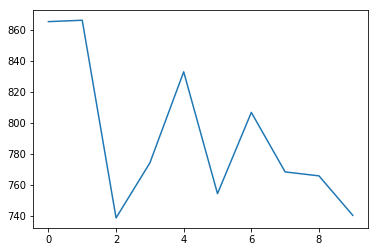

In [22]:
last_10_results = all_rewards[-10:]
plt.plot(np.arange(10), last_10_results)
plt.show()

In [23]:
np.mean(last_10_results)

791.307066427054

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
<p>
    Understanding the concept of DDPG was the hardest part of project, not having strong mathematical background made me unable to intuitively visualize how the Algorithm works. It took me more than a week to truly understand it.
</p>

<p>
    Yes, especially even though the Agent has reached the goal many times and received high rewards, the Agent still could fall from the local maximum of objective function to another local maximums that weren't as high as local maximum where the Agent was before.  
</p>